# ***Check GPU connect***

In [1]:
print("oke nice")

oke nice


In [2]:
import torch 

print(torch.__version__) 
print(torch.cuda.is_available()) 
print(torch.cuda.get_device_name(0))

2.4.0
True
Tesla P100-PCIE-16GB


In [3]:
!nvidia-smi

Sat Sep 28 08:40:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             25W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# ***Content***

## Clone dataset 

In [4]:
!pip install gdown

In [5]:
!git clone https://github.com/QuanHoangNgoc/data-temp.git

Cloning into 'data-temp'...
remote: Enumerating objects: 18218, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 18218 (delta 0), reused 3 (delta 0), pack-reused 18215 (from 1)
Receiving objects: 100% (18218/18218), 552.74 MiB | 25.32 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (18149/18149), done.


## Install

In [6]:
# !pip -q install sentence-transformers
!pip -q install faiss-gpu

In [7]:
import os
from PIL import Image
import numpy as np
import faiss
# from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import random

## Check dataset and create image_files 

In [8]:
def get_imagelist(root_folder, glob="jpg"): 
    paths = []
    for dirpath, dirnames, filenames in sorted(os.walk(root_folder)): #!!! must sorted 
        for file in filenames:  
            fullpath = os.path.join(dirpath, file)
            if(fullpath.split(".")[-1] != glob): continue
            paths.append(fullpath) 
    return paths

18148 ['/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_61.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_106.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_135.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_25.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_29.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_151.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_229.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_191.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_215.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_243.jpg']


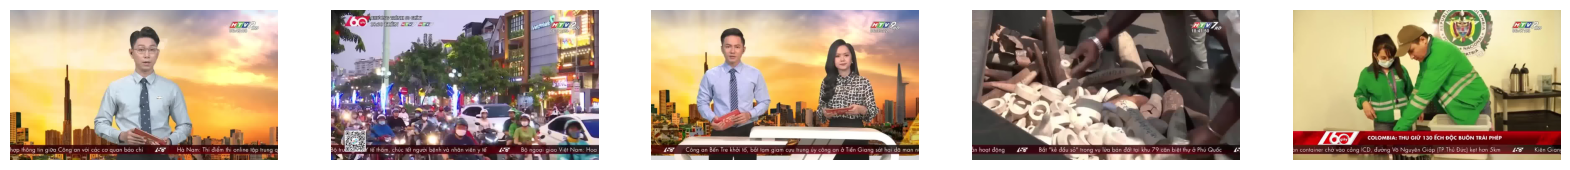

In [9]:
image_folder = "/kaggle/working/data-temp"

image_files = get_imagelist(image_folder)
print(len(image_files), image_files[:10]) 
selected_files = random.sample(image_files, 5)

plt.figure(figsize=(20, 5))

for i, file in enumerate(selected_files):
    image = Image.open(file)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

## Create embeddings and meta 

In [10]:
# # new a embedding model 
# model = SentenceTransformer('clip-ViT-B-32')

# CHUNK_SIZE = 256

# # process each chunk 
# def process_chunk(chunk):
#     images = []
#     for image_file in chunk: images.append(Image.open(image_file))

#     chunk_embeddings = model.encode(images)
#     return chunk_embeddings


# # create the embeddings 
# embeddings = []
# for i in range(0, len(image_files), CHUNK_SIZE):
#     print(i)
#     chunk = image_files[i:i + CHUNK_SIZE]
#     embeddings.extend(process_chunk(chunk))
    
# embeddings 

In [11]:
import gdown  

def drive_down(file_id, name_output_file): 
    url = f'https://drive.google.com/uc?id={file_id}'  
    output = name_output_file  
    gdown.download(url, output, quiet=False)

### clone embedding 

In [12]:
file_id = '1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT' 
drive_down(file_id, "emb.npy")
embeddings = np.load('emb.npy')

Downloading...
From (original): https://drive.google.com/uc?id=1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT
From (redirected): https://drive.google.com/uc?id=1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT&confirm=t&uuid=bd34a3fc-67ce-45e2-ab1d-6de032da84e3
To: /kaggle/working/emb.npy
100%|██████████| 3.48G/3.48G [00:27<00:00, 128MB/s] 


In [13]:
embeddings.shape 

(849188, 1024)

### clone meta

In [14]:
file_id = '1B-QZqlyoLW8oc4lyi6_tnV7MoUDA84Z-'
drive_down(file_id, "meta.pkl")

import pickle

with open('meta.pkl', 'rb') as file:
    meta = pickle.load(file)

Downloading...
From: https://drive.google.com/uc?id=1B-QZqlyoLW8oc4lyi6_tnV7MoUDA84Z-
To: /kaggle/working/meta.pkl
100%|██████████| 16.2M/16.2M [00:00<00:00, 46.1MB/s]


In [15]:
print(type(meta), len(meta), meta[:10])

<class 'list'> 849188 ['L01_V001_1.jpg', 'L01_V001_2.jpg', 'L01_V001_3.jpg', 'L01_V001_4.jpg', 'L01_V001_5.jpg', 'L01_V001_6.jpg', 'L01_V001_7.jpg', 'L01_V001_8.jpg', 'L01_V001_9.jpg', 'L01_V001_10.jpg']


## Create database 

In [16]:
# build vector db 
def create_database(embeddings): 
    dimension = len(embeddings[0])
    db = faiss.IndexFlatIP(dimension)
    db = faiss.IndexIDMap(db)

    # insert embeddings into database 
    vectors = np.array(embeddings).astype('float32')
    db.add_with_ids(vectors, np.array(range(len(embeddings))))
    return db 

In [17]:
db = create_database(embeddings)
db 

<faiss.swigfaiss.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x7f6db0254180> >

## Search

In [18]:
!pip install sentence-transformers==2.2.2
!pip install torchscale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=0d67fc77323e92105b508c71834596eaf761c9715d27abdea403c364818adfa5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 16.8 MB/s eta 0:00:00
  Created wheel for fairscale: filename=fairscale-0.4.0-py3-none-any.whl size=239917 sha256=2c29840975787101575baa

### set-up beit3 repo

In [19]:
file_id = '1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN'
drive_down(file_id, "beit3.zip")
# !unzip beit3.zip 

Downloading...
From: https://drive.google.com/uc?id=1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN
To: /kaggle/working/beit3.zip
100%|██████████| 708k/708k [00:00<00:00, 91.1MB/s]


In [20]:
!unzip beit3.zip 

Archive:  beit3.zip
   creating: BEiT3/
  inflating: BEiT3/beit3.py          
   creating: BEiT3/checkpoints/
  inflating: BEiT3/checkpoints/beit3.spm  
  inflating: BEiT3/datasets.py       
  inflating: BEiT3/engine_for_finetuning.py  
  inflating: BEiT3/glossary.py       
  inflating: BEiT3/modeling_finetune.py  
  inflating: BEiT3/modeling_utils.py  
  inflating: BEiT3/optim_factory.py  
  inflating: BEiT3/randaug.py        
  inflating: BEiT3/run_beit3_finetuning.py  
  inflating: BEiT3/test_similarity.py  
  inflating: BEiT3/utils_beit.py     
   creating: BEiT3/__pycache__/


In [21]:
os.listdir('/kaggle/working/BEiT3/checkpoints')

['beit3.spm']

In [22]:
file_id = '1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp'
drive_down(file_id, "beit3.pth")

Downloading...
From (original): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp
From (redirected): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp&confirm=t&uuid=10e435fd-df08-4d53-865a-e75ccad94302
To: /kaggle/working/beit3.pth
100%|██████████| 1.35G/1.35G [00:09<00:00, 142MB/s] 


### beit3 encoder model 

In [23]:
import BEiT3.beit3 as module

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = "beit3.pth"
sentencepiece_model = os.path.join('/kaggle/working/BEiT3/checkpoints', 'beit3.spm')

In [25]:
model, transform, tokenizer = module.load_model(device, checkpoint, sentencepiece_model)

/kaggle/working/BEiT3/utils_beit.py:526: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location='cpu')


Load ckpt from beit3.pth
Load state_dict by model_key = model


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### search on db

In [26]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=11dbc9780421bcd94b705a47542df8bb6faa7fdba58cd902863493c61825e54b
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      

In [27]:
from googletrans import Translator
translator = Translator()

In [28]:
def search(query, db, meta, top_k=100):
    # Query can be image-path or text
    if query.endswith(".jpg"): query = Image.open(query) #!!! not process with image 
    
    text = translator.translate(query, dest='en').text
    emb = module.encode_text(model, tokenizer, text, device)
    print("-", text, emb.shape)
    
    concat_emb = emb.astype("float32").reshape(1, -1)
    rels, indices = db.search(concat_emb, top_k)
    print("-", indices[0][:10])
    print("-", rels[0][:10])

    retrieved_meta = [meta[i] for i in indices[0]]
    print("- ANSWER IS:", retrieved_meta[:10], "\n\n")
    return query, retrieved_meta

In [29]:
query = "Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng."
search(query, db, meta, top_k=100)

/kaggle/working/BEiT3/beit3.py:432: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


- A boat that can run on ice, black in color. This boat is powered by a propeller engine on top that blows out the back. The boat was a rescue vehicle for a victim who fell into an icy lake. (1, 1024)
- [310522 310567 310565 310561 310563 310564 310491 310555 310566 310562]
- [0.73276746 0.7315209  0.73011756 0.7284763  0.7284543  0.72829175
 0.72547865 0.7249843  0.7247753  0.7243809 ]
- ANSWER IS: ['L09_V017_822.jpg', 'L09_V017_867.jpg', 'L09_V017_865.jpg', 'L09_V017_861.jpg', 'L09_V017_863.jpg', 'L09_V017_864.jpg', 'L09_V017_791.jpg', 'L09_V017_855.jpg', 'L09_V017_866.jpg', 'L09_V017_862.jpg'] 




('Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng.',
 ['L09_V017_822.jpg',
  'L09_V017_867.jpg',
  'L09_V017_865.jpg',
  'L09_V017_861.jpg',
  'L09_V017_863.jpg',
  'L09_V017_864.jpg',
  'L09_V017_791.jpg',
  'L09_V017_855.jpg',
  'L09_V017_866.jpg',
  'L09_V017_862.jpg',
  'L09_V017_824.jpg',
  'L09_V017_823.jpg',
  'L09_V017_859.jpg',
  'L09_V017_860.jpg',
  'L09_V017_854.jpg',
  'L09_V017_857.jpg',
  'L09_V017_792.jpg',
  'L09_V017_858.jpg',
  'L09_V017_856.jpg',
  'L09_V017_853.jpg',
  'L09_V017_797.jpg',
  'L09_V017_796.jpg',
  'L09_V017_825.jpg',
  'L09_V017_844.jpg',
  'L09_V017_849.jpg',
  'L09_V017_843.jpg',
  'L09_V017_846.jpg',
  'L09_V001_868.jpg',
  'L15_V031_761.jpg',
  'L15_V031_759.jpg',
  'L15_V031_762.jpg',
  'L09_V017_847.jpg',
  'L09_V017_845.jpg',
  'L09_V001_869.jpg',
  'L15_V031_760.jpg',
  'L09_V017_848.jpg',
  'L09

In [32]:
def mapping_frame(x): 
    frame_idx = int(x.split('_')[-1].split('.')[0])
    frame_idx = (frame_idx-1) * 25 
    video = x.split('_')[0] + '_' + x.split('_')[1]
    return frame_idx, video 

import csv
def fill(content, need_video):
    _, lst = search(content, db, meta, top_k=1234) #!!! choose a constance 
    new_list = [] 
    for x in lst: 
        frame_idx, video = mapping_frame(x) 
        if(need_video == None): 
            new_list.append([video, frame_idx])
        if(video != need_video): continue
        new_list.append([video, frame_idx])
        
    new_list = new_list[:500]
    print(_, new_list) 
    
    with open("file.csv", 'w', newline='') as csvfile:
        # Create a CSV writer object
        writer = csv.writer(csvfile)

        # Write the data to the CSV file
        writer.writerows(new_list) 

In [33]:
content = 'một chiếc xe máy không có gương chiếu hậu, bên cạnh là dải phân cách làn đường'
fill(content, None) ### check mapping 

- a motorbike without a rearview mirror, next to a lane divider (1, 1024)
- [252422  25765 743727 287465 525357 504456 352629 221975 525355 823435]
- [0.69922936 0.69124264 0.6911622  0.6850673  0.68440706 0.6838344
 0.68238723 0.6822317  0.68203336 0.6819752 ]
- ANSWER IS: ['L08_V001_1251.jpg', 'L01_V023_1111.jpg', 'L21_V006_743.jpg', 'L08_V030_444.jpg', 'L15_V017_498.jpg', 'L14_V027_1165.jpg', 'L10_V021_1220.jpg', 'L07_V006_494.jpg', 'L15_V017_496.jpg', 'L23_V023_224.jpg'] 


một chiếc xe máy không có gương chiếu hậu, bên cạnh là dải phân cách làn đường [['L08_V001', 31250], ['L01_V023', 27750], ['L21_V006', 18550], ['L08_V030', 11075], ['L15_V017', 12425], ['L14_V027', 29100], ['L10_V021', 30475], ['L07_V006', 12325], ['L15_V017', 12375], ['L23_V023', 5575], ['L01_V023', 27800], ['L16_V012', 28325], ['L15_V017', 12400], ['L09_V012', 14175], ['L14_V027', 29150], ['L09_V026', 15750], ['L02_V015', 23100], ['L16_V012', 28300], ['L16_V012', 28275], ['L15_V019', 12475], ['L19_V026', 11150

## Main script

In [34]:
import shutil, csv

def main_submit(in_folder, out_folder, ispair=True):
    if os.path.exists(out_folder): 
        shutil.rmtree(out_folder)
    os.makedirs(out_folder, exist_ok=True)
    print(f"-\/- Remove and renew [{out_folder}]")
    
    for namefile in os.listdir(in_folder):
        with open(os.path.join(in_folder, namefile), 'r') as file:
            # Read the entire file content
            content = file.read()
            content = content.replace("\n", " ")  
            
            # Get retrival list and deformat it 
            _, lst = search(content, db, meta, top_k=100) #!!! main 
            new_list = [] 
            for x in lst: 
                frame_idx, video = mapping_frame(x) #!!! mapping 
                new_list.append([video, frame_idx])
            print(new_list[:10], "\n\n") 
            
            # Write file csv 
            path = os.path.join(out_folder, namefile.replace(".txt", ".csv"))
            with open(path, 'w', newline='') as csvfile:
                # Create a CSV writer object
                writer = csv.writer(csvfile)
    
                # Write the data to the CSV file
                writer.writerows(new_list) 

In [35]:
in_folder = '/kaggle/input/test-de-2/pack2-groupA'
out_folder = '/kaggle/working/submit'
main_submit(in_folder, out_folder, False)

-\/- Remove and renew [/kaggle/working/submit]
- A man wearing a black shirt and short hair is installing or adjusting a metal plate on the underside of an airplane. Initially it was a frontal angle and then a close-up shot of this person's face. (1, 1024)
- [288415 288412 288354 288398 288418 288399 288417  94218 557424 288416]
- [0.7271758  0.70697904 0.7055246  0.699798   0.6917206  0.69130826
 0.6883579  0.68699145 0.6866149  0.68448555]
- ANSWER IS: ['L09_V001_81.jpg', 'L09_V001_78.jpg', 'L09_V001_20.jpg', 'L09_V001_64.jpg', 'L09_V001_84.jpg', 'L09_V001_65.jpg', 'L09_V001_83.jpg', 'L03_V020_882.jpg', 'L16_V010_623.jpg', 'L09_V001_82.jpg'] 


[['L09_V001', 2000], ['L09_V001', 1925], ['L09_V001', 475], ['L09_V001', 1575], ['L09_V001', 2075], ['L09_V001', 1600], ['L09_V001', 2050], ['L03_V020', 22025], ['L16_V010', 15550], ['L09_V001', 2025]] 


- Scene in a bicycle race, the three leading riders take turns wearing blue shirts; green; red yellow black. The race team is going through 

In [36]:
# Specify the folder to compress and the output ZIP file name  
folder_to_compress = '/kaggle/working/submit' 
output_zip_file = '/kaggle/working/submit.zip'  

# Compress the runs to zip 
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_compress)

'/kaggle/working/submit.zip'